In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv('API_BGD_DS2_en_csv_v2_1224638.csv',header=2)
print(plt.style.available)
plt.style.use('fivethirtyeight')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
exportdf = df[df['Indicator Name'].str.contains('export')]

In [3]:
exportdf['Indicator Name']
# index : 156,194,485,641,921,1101,752,1105,1317

0       Travel services (% of commercial service exports)
1       Merchandise exports to low- and middle-income ...
103               Cost to export, border compliance (US$)
124           Travel services (% of service exports, BoP)
148     Debt service (PPG and IMF only, % of exports o...
156     Communications, computer, etc. (% of service e...
194     Computer, communications and other services (%...
195       Manufactures exports (% of merchandise exports)
254     Merchandise exports to low- and middle-income ...
310           Arms exports (SIPRI trend indicator values)
311               Lead time to export, median case (days)
339        Transport services (% of service exports, BoP)
343     Merchandise exports to low- and middle-income ...
344     Medium and high-tech exports (% manufactured e...
401     Merchandise exports by the reporting economy (...
402               Fuel exports (% of merchandise exports)
467                        Taxes on exports (current LCU)
485           

In [4]:
# index : 156,194,485,641,921,1101,752,1105,1317
cols = list(range(2000,2019))
osdf = df.loc[[156,194,485,641,921,1101,752,1105,1317],]
osdf = osdf.drop(['Country Name','Country Code','Indicator Code'], axis=1)
osdf.set_index('Indicator Name', inplace=True)
osdf= osdf.T
osdf


Indicator Name,"Communications, computer, etc. (% of service exports, BoP)","Computer, communications and other services (% of commercial service exports)","Service exports (BoP, current US$)",Commercial service exports (current US$),"ICT service exports (% of service exports, BoP)","ICT service exports (BoP, current US$)",High-technology exports (% of manufactured exports),High-technology exports (current US$),ICT goods exports (% of total goods exports)
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2016,79.626107,64.068305,3.540625e+09,2.007596e+09,17.606522,6.233809e+08,NaN,NaN,NaN
2017,74.168748,57.202109,3.869670e+09,2.274251e+09,13.590710,5.259156e+08,NaN,NaN,NaN
2018,52.415236,60.074882,5.481675e+09,2.980261e+09,NaN,NaN,NaN,NaN,NaN
2019,56.711755,63.390282,6.128477e+09,3.207307e+09,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


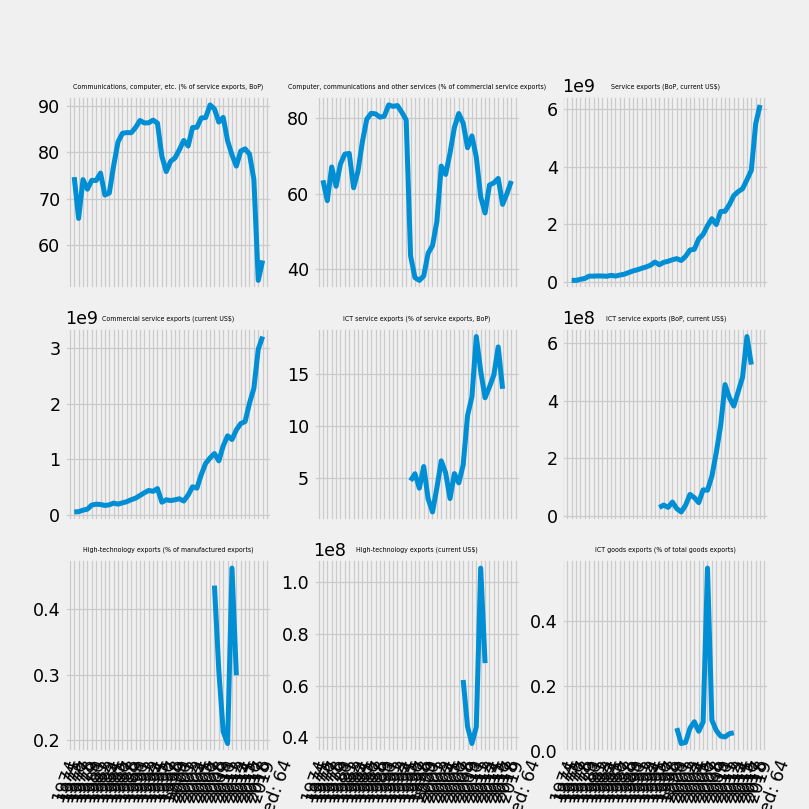

In [14]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,sharex=True,figsize=(9,9))
pltlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
colist = list(osdf.columns)
accum = 0
for axs in pltlist:
    axs.plot(osdf[colist[accum]])
    axs.set_title(colist[accum], fontsize=5)
    plt.setp(axs.xaxis.get_ticklabels(), rotation=70 )
    accum +=1

# osdf['Communications, computer, etc. (% of service exports, BoP)'].plot()

In [6]:
figure = plt.figure(figsize=[9,9])
colist = list(osdf.columns)
accum=0
for x in range(1,4):
    for y in range(1,4):
        plt.subplot(3,3,accum+1)
        plt.plot(osdf[colist[accum]])
        plt.title(colist[accum], fontsize=5)
        
        accum +=1
# osdf['Communications, computer, etc. (% of service exports, BoP)'].plot()

# plt.subplot(335)
# osdf['Communications, computer, etc. (% of service exports, BoP)'].plot()

<IPython.core.display.Javascript object>

In [5]:
import matplotlib.ticker as tick
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

formatter = tick.FuncFormatter(currency)


In [6]:

def functionplot(colname,divby,xlab,ylab,title):
    plt.figure(figsize=(9,7))
    plt.plot(osdf[colname]/divby)
    plt.xticks(rotation=70)
    plt.ylabel(xlab)
    plt.xlabel(ylab)
    plt.title(title)
    return
#functionplot('ICT service exports (BoP, current US$)',1e8,'in billion dollars','Year','ICT service exports (BoP, current US$)')

<IPython.core.display.Javascript object>


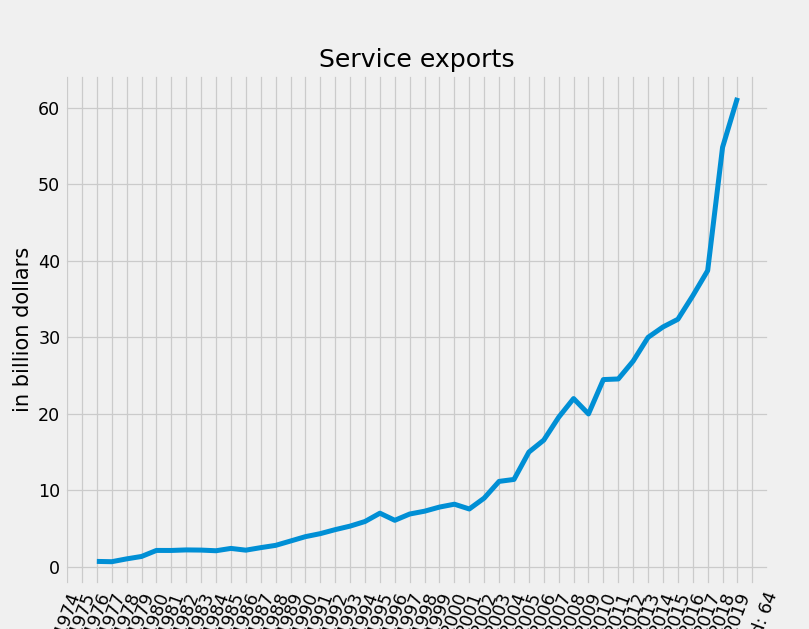

In [17]:
functionplot('Service exports (BoP, current US$)',1e8,'in billion dollars','Year','Service exports')

In [7]:
x = osdf.index[:-1]
y = list(osdf['ICT service exports (BoP, current US$)'])
y = y[:-1]
x = pd.to_datetime(x).year
x

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018, 2019],
           dtype='int64')

<IPython.core.display.Javascript object>


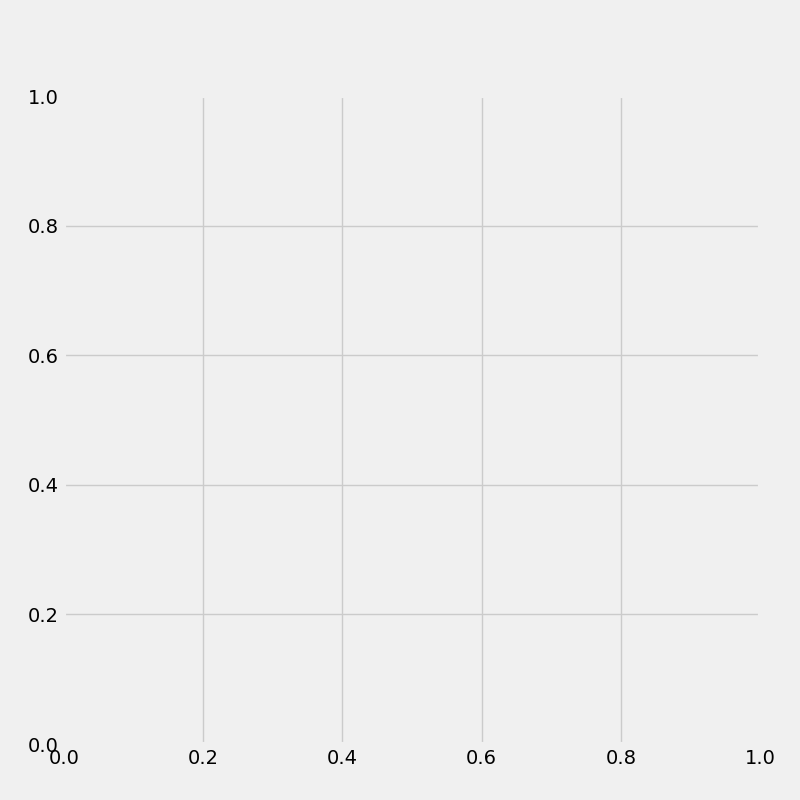

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
def tutorial_temp(ax,x,y,xtick_list,xlabel,ylabel):
    ax.plot(x,y)
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment='right')

    def value(x, pos):
        """The two args are the value and tick position"""
        if x >= 1e9:
            s = '${:1.1f}B'.format(x*1e-9)
        else:
            s = '${:1.0f}M'.format(x*1e-6)
        return s

    formatter = tick.FuncFormatter(value)

    # Now we'll move our title up since it's getting a little cramped
    #ax.title.set(y=1.05)

    ax.set(xlabel=xlabel, ylabel=ylabel)
 
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xticks(xtick_list)
    #fig.subplots_adjust(right = 1)
xtick = list(range(1996,2018,2))
#tutorial_temp(ax,x,y,xtick,'Year','Value','ICT exports')

<IPython.core.display.Javascript object>


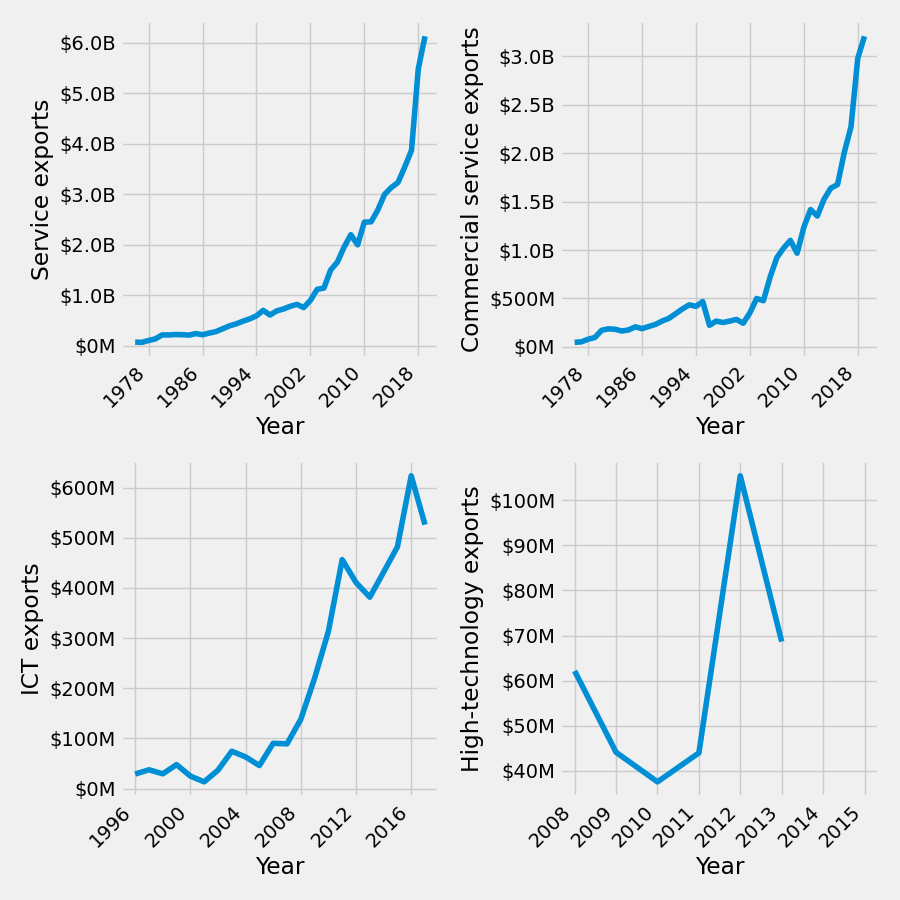

In [9]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(9,9))
y1 = list(osdf['Service exports (BoP, current US$)'])[:-1]
y2= list(osdf['Commercial service exports (current US$)'])[:-1]
y3= list(osdf['ICT service exports (BoP, current US$)'])[:-1]
y4= list(osdf['High-technology exports (current US$)'])[:-1]
xtick1 = list(range(1978,2020,8))
xtick2 = list(range(1978,2019,8))
xtick3 = list(range(1996,2018,4))
xtick4 = list(range(2008,2016,))
tutorial_temp(ax1,x,y1,xtick1,'Year','Service exports')
tutorial_temp(ax2,x,y2,xtick2,'Year','Commercial service exports')
tutorial_temp(ax3,x,y3,xtick3,'Year','ICT exports')
tutorial_temp(ax4,x,y4,xtick4,'Year','High-technology exports')
fig.tight_layout()

In [109]:
exportdf = df[df['Indicator Name'].str.contains('transport')]
exortdf = exportdf.loc[[97,131,312,802,1287,1372],:]

# osdf = exportdf.drop(['Country Name','Country Code','Indicator Code'], axis=1)
# osdf.set_index('Indicator Name', inplace=True)
# exportdf= osdf.T
exportdf

Indicator Name,"Air transport, passengers carried","Air transport, freight (million ton-km)",Machinery and transport equipment (% of value added in manufacturing)
1960,NaN,NaN,NaN
1961,NaN,NaN,NaN
1962,NaN,NaN,NaN
1963,NaN,NaN,NaN
1964,NaN,NaN,NaN
...,...,...,...
2016,3.815869e+06,53.979162,NaN
2017,4.660739e+06,61.749978,NaN
2018,5.984155e+06,63.818152,NaN
2019,NaN,NaN,NaN


<IPython.core.display.Javascript object>


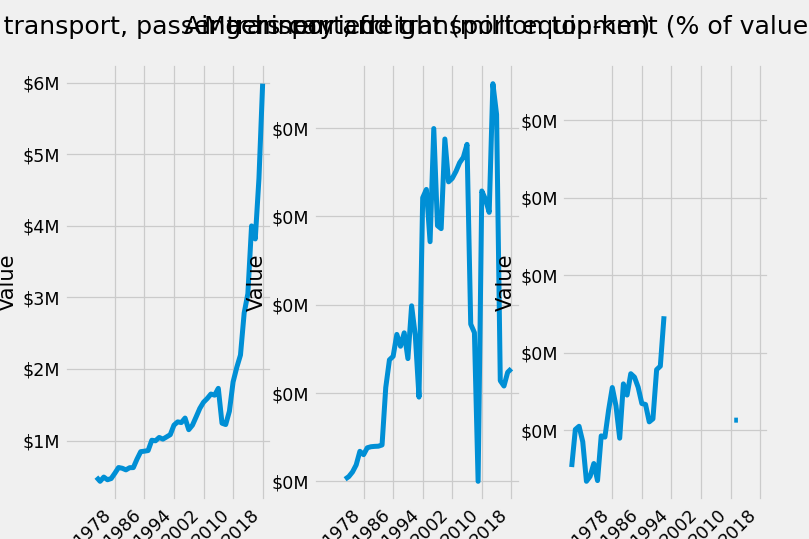

<ipython-input-110-7cc7a6c95d29>:17: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


In [110]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=True,figsize=(9,6))
pltlist = [ax1,ax2,ax3]
colist = list(exportdf.columns)
y = []
for col in colist:
    y.append(list(exportdf[col])[:-1])

    
xtick = [list(range(1978,2020,8)),list(range(1978,2020,8)),list(range(1978,2020,8))]
title = colist
len(xtick)
accum = 0
for axs in pltlist:
    tutorial_temp(pltlist[accum],x,y[accum],xtick[accum],'Year','Value',title[accum])
    pltlist[accum]
    accum +=1
fig.tight_layout()